<h3>Statistics is an endless chapter.</h3>

There is no way to cover all topics related to statistics in any course. Here I can only scratch the surface and try some very simple example for absolute beginners. The aim is to expain in simple terms how you add statistical function to your data if you want it.

Most of the time we talk about statistics when we talk about significance. More exactly we adress a question of significance in cases we are not sure whether measurements in group **A** are the same or different from the group *B*. This is one out of three typical and frequent cases we deal in biology. All three of them are the following:

1. Statistics of two groups. T-test is famous example (and few more to come). 
2. Statisticss of rare events (Binomial, Poisson and alike. Not really planning in here).
3. Statistics of lists (like Gene Onthology enrichments, significance of Venn intersections. I will keep it for later).

If you want some statistical function you usually find it in Scipy package. It collects not only statistical tests, but also random generators of different distributions, some useful tests to check properties of data and many more. Do spend you time to scroll through the pages of scipy, especially scipy.stats. For every function you will see the required input parameters, the default conditions, which you can modify if needed, and what every function returns. Also small example how to use is included. You have to read the description, recommendations and warnings. If you think it is appropriate for your case, then try it.

<h3>When we use the t-test?</h3>
In case we have two groups of data, each with own average (which is close to median and modal), some variation between data declining both ways from the average, we can tink if t-test and other parametric tests.

In [2]:
import scipy.stats as ss #this is my way of importing it and my abbreviation

In [ ]:
#skip this block is you used one above
from scipy.stats import ttest_ind #this is more frequent case of import, but it only limits to one function
#you can also do this
from scipy import stats #you will import all functions from stats, but you have to refer to stats every time you call the function

In [3]:
a=[1,2,3,2,1]
b=[3,4,5,6,1]
stat,p_val=ss.ttest_ind(a,b)
print("p-value for a and b:", p_val)
if p_val<0.05:
    print("a and b are significandly different")
else:
    print("Difference is not significant")

p-value for a and b: 0.06558767691472245
Difference is not significant


You can change values in series for a and b and see how the p-value changes. If you want to use another test, you check scipy stats pages, choose what you want and what the name of the function is. All those functions are made uniformly: you have to use a minimum of the entry data (and/or change some from their default conditions), then collect the output data (marked as returned) and that's it.

For instance, for paired t-test it will be like this:

In [4]:
stat, p_val=ss.ttest_rel(a,b)
print("p-value for a and b:", p_val)
if p_val<0.05:
    print("a and b are significandly different")
else:
    print("Difference is not significant")

p-value for a and b: 0.034109423167409635
a and b are significandly different


Check the pages in scipy.stats. Notice, there are two functions for t-test. One is unpaired (this one), another one is paired. There are also conditions for shapes, missing values etc. You are responsible for correct use of those functions. Do not use them blindly.

For instance, t-test and many other classic test belong to the family of "parametric" tests, in other worlds they assume normally distributed data. In biology, we typically use those tests without much thinking whether the data are really normally distributed. Ironically, it is rarely the case, we either have too small data to check, or we have it big, but they are rarely normal, and we often ignore the revealed deviations from normality.

In this particular example, the amount of data is very small. But if you deal with big data, always check them for normality before you use parametric tests. 

Alternatively, use non-parametric tests, which do not rely on the assumption of normality. You can try Mann-Whitney test (although the size of each samples should be at least 20), or it can be Wilcoxon test (it is equivalent to a paired t-test), and so on. Here is an example with Mann-Whitney test:

In [5]:
stats, p_val=ss.mannwhitneyu(a,b)
print(p_val)

0.05524601202783401


**Parametric or Non-parametric?**
If you work with a small data sets, which is very often the case in cell biology, then non-parametric test is more reliable, because you simply do not have to hypothesise on the structure of your data. 
Note there are tests for normality included in the same scipy package. If sample is big enough you can use those tests. For instance

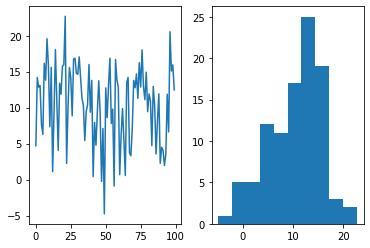

In [6]:
import numpy as np, matplotlib.pyplot as plt
data=np.random.normal(size=100, loc=10, scale=5) #generates data with average=10, stdev=5
plt.subplot(121)
plt.plot(data)
plt.subplot(122)
plt.hist(data);

A brief note to the way we make the normally distributed data. Here we used a numpy package, function random.normal. Within numpy.random  there are lots of other distributions, which you can use. Simply check those pages (like https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) You can also try random package for different kinds of random data (import random).

In [7]:
#data look quite "normal", let's use some test for normality
stats, p_val= ss.normaltest(data)
print(p_val)
if p_val<0.05:
    print("data are normally distributed")

0.16415896169741073


Note, however, if you data size is small, even normally distributed data run a risk to fail the test.

In [15]:
#reduce the size of the data by taking first 10 values
stats, p_val= ss.normaltest(data[:10])
print(p_val)
if p_val<0.05:
    print("data are normally distributed")

0.22172416316798949


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1449: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Very likely you will not see the statement, that the data are normally distributed, also you will see the warning that sample size is too small. What is to learn here? Avoid small sample sizes, try to collect enough data points in your experiemts even if data collection is boring and time consimung.

In some cases, like expression microarrays, data are nearly normal (after filtering and log-transformation), and it is already demonstrated by others. Then you can use parametric tests with confidence, that you do not make serious mistake in assuming normally distributed data.

Here are some other simple examples when and what to use.
<h3>Comparing two curves, what kind of test to use?</h3>
This is frequently asked question on the internet, and also in the lab. You cannot treat two curves as two data sets and apply for instance paired t-test. However, Wilcoxon test works nicely, and it is appropriate for this.

Text(0.5, 1.0, 'Compare two growth curves')

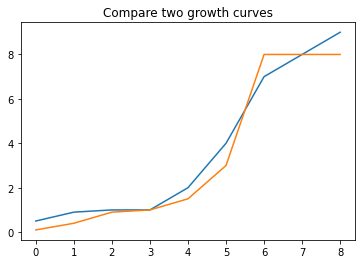

In [8]:
ex1=[0.5,0.9,1,1,2,4,7,8,9]
ex2=[0.1,0.4,0.9,1,1.5,3,8,8,8]
time=range(len(ex1))
plt.plot(time,ex1)
plt.plot(time,ex2)
plt.title("Compare two growth curves")

In [9]:
#are those two trends statistically different?
stat, p_value=ss.wilcoxon(ex1,ex2)
if p_val>0.05:
    print("trends are not different")
print(p_val)

trends are not different
0.05524601202783401


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


There are some confusions regarding significance of the test and effect size. Trends can be significantly different even if the quantitative difference between them is very small. p-value follows the consistency of one curve being above the other. However it does not judge the quantitative difference between two curves. You should report it separately, for instance as mean difference, and make your opinion, whether you think the difference is big enough to be biologically significant. 

<h3> Correlations</h3>
There are two major kinds of correlations used in biology, Pearson and Spearman. Pearson correlation is quantitative, it means the bigger values in the group will have a bigger influence to the outcome. This type of correlation is relevant if data are well scattered across all values (no clutter at some particular range or outliers), and if you can see a good linearity between values you want to correlate. It is always helpful to visualise those groups of data you want to check for correlation.
For instance we can correlate growth curves used above, also check for linearity.

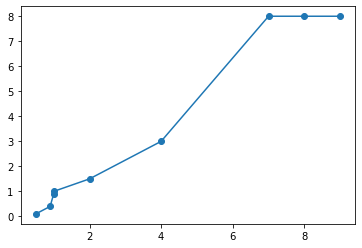

In [12]:
plt.plot(ex1, ex2, "o-");

We see that data ponts are vell scattered along the range, also no signs of curvature revealed

In [14]:
#try pearson correlation
r, p=ss.pearsonr(ex1, ex2)
print("significance of Pearson", p)
print("R", r)

significance of Pearson 1.3389952023153184e-06
R 0.9850072014778637


You see that r-value is close to 1, meaning nearly 1 to 1 positive correlation, the p-value is low, the correlation is significant. Pearson correlation is comparable with linear regression. P-value for linear regression is identical to pearson. In addition, you get coefficients for the linear function which can be used to draw the plot.

In [17]:
#this function returns many more parameters
slope, intercept, r_value, p_value, std_err = ss.linregress(ex1, ex2)
print("significance of regression", p_value)
print("slope and intercept", slope, intercept)

significance of regression 1.338995202315249e-06
slope and intercept 1.0164085061695984 -0.33867156734050985


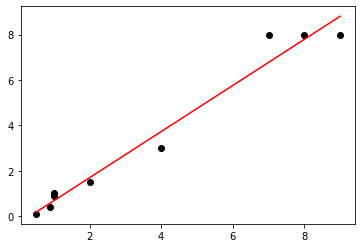

In [20]:
#with known slope and intercept generate new y=values
new_y=[x*slope + intercept for x in ex1]
plt.scatter(ex1,ex2, c="black")
plt.plot(ex1,new_y, c="red");

The plot generally confirms that linear approximation fits well to the data. Besides, you know how to draw the line through the data points.

There is nothing wrong to try spearman correlation for the same data. The p-values can be different, but in a good case, it should be close to one another. It will also mean, that the correlation is real and not dependent on the method of choice.

In [22]:
corr, p_val= ss.spearmanr(ex1,ex2)
print("Corr, p_value for spearman correlation", corr, p_val)
if p_val<0.05:
    print("correlation is significant")

Corr, p_value for spearman correlation 0.9788031651192812 4.471996762008369e-06
correlation is significant


Lets tray some other data, where pearson and spearman correlations will be substantially different. For this we make two sets of data with non-linear relations.

x [0, 2, 4, 6, 8]
y [0, 8, 64, 216, 512]


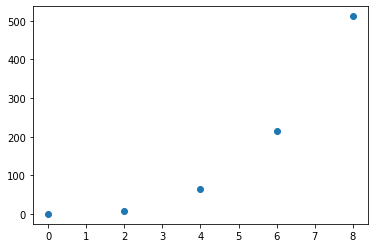

In [10]:
x=list(range(0,10,2)) #this is ow you make a regular range of data through start and stop values
y=[val**3 for val in x] #make y as function of x power 3.
print("x", x)
print('y',y)
plt.scatter(x,y);

In [35]:
r, pearson_p=ss.pearsonr(x,y)
print("pearson p-value", pearson_p)
corr, spearman_p=ss.spearmanr(x,y)
print("spearman p_value", spearman_p)

pearson p-value 0.03416742881503284
spearman p_value 1.4042654220543672e-24


Here you see, that significance for pearson and spearman differ dramatically. In such cases (when data are not in linear relation) pearson correlation should not be used. But do *x* and *y* correlate? Yes.
Why spearman correlation works with non-linear data? Spearman correlation checks the ranks within data series and ignores the real values. Therefore (non)linearity does not make an effect.
There is one more correlation based on ranks, Kendall. However, it is rarely used in biology. I cannot explain why.

In [36]:
tau, kendall_p=ss.kendalltau(x,y)
print("kendall p_value", kendall_p)

kendall p_value 0.016666666666666666


Note, that kendall test is considered as more conservative test compared to spearman, and less sensitive to errors and outliers. Spearman correlation is sensitive to redundant data and null values. You can check it yourself. Just add to x and y null data and see whether spearman p-value will change.

In [15]:
x,y=[1,3,2],[3,2,2]
for i in range(5):
    print("x:", x)
    print("y:", y)
    corr, spearman_p=ss.spearmanr(x,y)
    print("Added zeros", i, "spearman p_value", spearman_p)
    x.append(0)
    y.append(0)

x: [1, 3, 2]
y: [3, 2, 2]
Added zeros 0 spearman p_value 0.3333333333333332
x: [1, 3, 2, 0]
y: [3, 2, 2, 0]
Added zeros 1 spearman p_value 0.683772233983162
x: [1, 3, 2, 0, 0]
y: [3, 2, 2, 0, 0]
Added zeros 2 spearman p_value 0.23615367738664056
x: [1, 3, 2, 0, 0, 0]
y: [3, 2, 2, 0, 0, 0]
Added zeros 3 spearman p_value 0.06322683843505035
x: [1, 3, 2, 0, 0, 0, 0]
y: [3, 2, 2, 0, 0, 0, 0]
Added zeros 4 spearman p_value 0.013685322211787308


As you can see, the p-values are decreasing with added zero values. Careful with your data, if they contain many zeros. Those zeros will inflate significance of you result, and they should be filtered off before correlation analysis.

This is probably the end of the introduction to the elementary use of the scipy package in estimation of significance in the biological data. As I said, the real numbe of real cases is endless and hard to cover. It is importand to understand the principle, where you find those functions and how you use them. The rest is up to everyone. I will add more scripts and subjects in my free time, and I will try to be simple as usual.